In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('Monopoly.csv', sep=',', skiprows=1)
df.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN


In [83]:
# variables categoricas a eliminar IndRev12-01
deleted = df.select_dtypes(include='object').iloc[:, 1:]
df = df.drop(deleted, axis=1)

In [85]:
# Borramos ID y Unnamed
df = df.drop(['Id', 'Unnamed: 574'], axis=1)

In [87]:
# one hot encoder para la variable sexo
df = pd.get_dummies(df, columns=['Sexo'], prefix='Sexo', dtype=int)
df.head()

,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target,Sexo_H,Sexo_M
0,160,13.0,43,NaN,130,1,1,0,0,1,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,0,0,1
1,160,13.0,46,143640.0,69,1,0,0,0,1,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,0,1,0
2,170,13.0,45,929106.0,24,1,1,0,0,1,...,216676,0.0,0.0,0.0,7400.0,0,0.0,0,1,0
3,151,13.0,46,172447.0,134,0,1,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,0,1,0
4,170,13.0,46,805250.0,116,0,1,1,0,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,0,1,0


In [70]:
# convertir los datos desde float64 e int64 a float32 e int32
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('float32')
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('int32')


In [11]:
# Revisar datos duplicados
df.index.is_unique

True

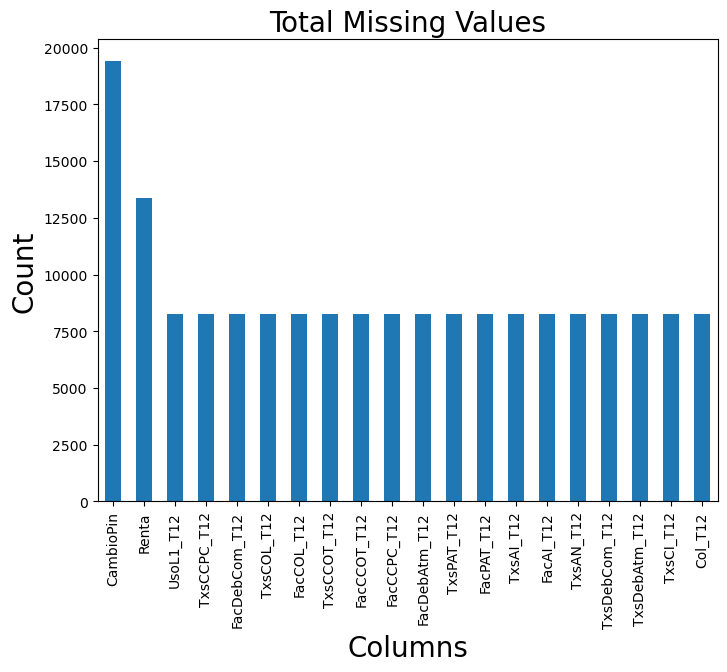

In [13]:
# Verificar los primeros 20 columnas con nan
total_nan = df.isnull().sum().sort_values(ascending = False)
total_select = total_nan.head(20)
total_select.plot(kind='bar', figsize=(8,6), fontsize=10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)
plt.show()

In [241]:
# verificar todos los nans
cols_nan = [[col, df[col].isna().sum()] for col in df.columns if df[col].isna().sum() > 0] 
pd.DataFrame(cols_nan)

,0,1
0,Renta,13342
1,CambioPin,19372
2,FlgAct_T12,8248
3,FlgActCN_T12,8248
4,FlgActCI_T12,8248
...,...,...
492,EeccNac_T02,12
493,EeccInt_T02,12
494,UsoL1_T02,12
495,UsoL2_T02,12


In [89]:
df['Region'].unique().tolist()

[13.0, 9.0, 10.0, 8.0, 7.0, 6.0, 5.0, 12.0, 11.0, 4.0, 1.0, 2.0, 3.0, nan]

In [91]:
df = df.dropna(subset=['Region'])
df['Region'] = df['Region'].astype('int32')
df

,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target,Sexo_H,Sexo_M
0,160,13,43,NaN,130,1,1,0,0,1,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,0,0,1
1,160,13,46,143640.0,69,1,0,0,0,1,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,0,1,0
2,170,13,45,929106.0,24,1,1,0,0,1,...,216676,0.0,0.0,0.0,7400.0,0,0.0,0,1,0
3,151,13,46,172447.0,134,0,1,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,0,1,0
4,170,13,46,805250.0,116,0,1,1,0,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,160,13,51,364978.0,57,1,1,1,0,1,...,300000,0.0,478320.0,0.0,478320.0,12668,0.0,0,1,0
51120,170,13,51,625376.0,39,1,0,0,0,1,...,166098,0.0,166098.0,0.0,0.0,572363,0.0,0,1,0
51121,160,13,47,806220.0,153,1,1,0,0,1,...,18891,0.0,9652.0,0.0,9652.0,16241,0.0,0,1,0
51122,160,13,47,NaN,11,1,0,0,0,1,...,26528,0.0,24638.0,0.0,24638.0,84982,0.0,0,0,1


In [261]:
# Revisar correlaciones
df_num = df.select_dtypes('number')
target_corr = 'Fac_T02'
df_num_corr = df_num.corr()[target_corr]
top_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print('Hay {} variables altamente correlacionadas con {}:\n{}'.format(len(top_features), target_corr, top_features))

Hay 5 variables altamente correlacionadas con Fac_T02:
Fac_T02        1.000000
FacCN_T02      0.896634
FacCCPC_T02    0.550829
Txs_T02        0.535900
ColL1T0_T02    0.501639
Name: Fac_T02, dtype: float64


Hay 5 variables altamente correlacionadas con Fac_T12:
Fac_T12        1.000000
FacCN_T12      0.897945
Txs_T12        0.547785
ColL1T0_T12    0.544076
FacCCPC_T12    0.529106
Name: Fac_T12, dtype: float64

In [135]:
renta_by_region = df.groupby(['Region'])['Renta'].mean().reset_index().sort_values(by='Region')

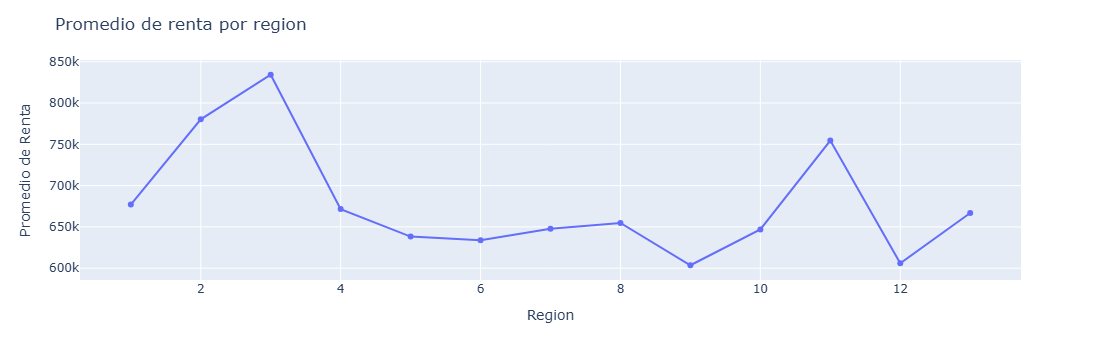

In [145]:
import plotly.express as px

fig = px.line(renta_by_region, x='Region', y='Renta')
fig.update_traces(mode='markers+lines')
fig.update_layout(title='Promedio de renta por region', xaxis_title='Region', yaxis_title='Promedio de Renta')
fig.show()

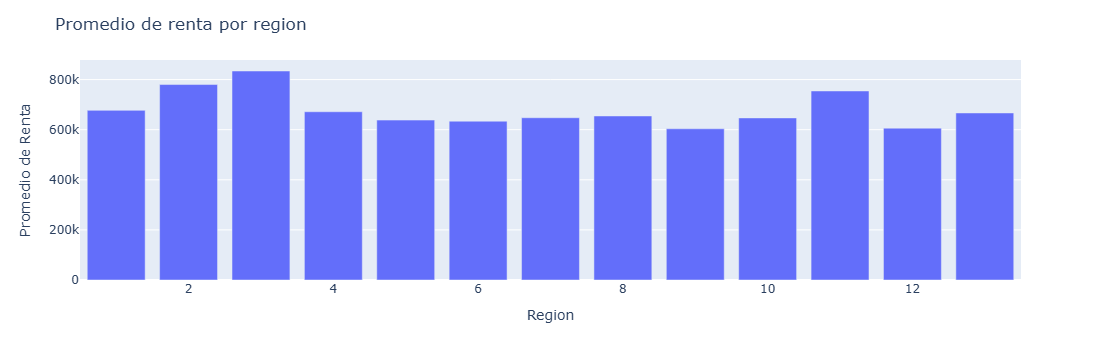

In [141]:
import plotly.express as px

fig = px.bar(renta_by_region, x='Region', y='Renta')
fig.update_layout(title='Promedio de renta por region', xaxis_title='Region', yaxis_title='Promedio de Renta')
fig.show()

In [157]:
geodata = df.groupby(['Region'])['Renta'].mean().reset_index(name='Promedio de renta por region').round(2)

regiones = {
    1:'Tarapacá',
    2:'Antofagasta',
    3:'Atacama',
    4:'Coquimbo',
    5:'Valparaíso',
    6:'O\'Higgins',
    7:'Maule',
    8:'BioBío',
    9:'Araucanía',
    10:'Los Lagos',
    11:'Aisén',
    12:'Magallanes',
    13:'Metropolitana'
}

geodata['RegionNombre'] = geodata['Region'].map(regiones)
display(geodata)

,Region,Promedio de renta por region,RegionNombre
0,1,677107.53,Tarapacá
1,2,780188.74,Antofagasta
2,3,834220.36,Atacama
3,4,671515.10,Coquimbo
4,5,638278.77,Valparaíso
5,6,633831.18,O'Higgins
6,7,647667.64,Maule
7,8,654702.99,BioBío
8,9,603555.60,Araucanía
9,10,646954.64,Los Lagos


In [229]:
meses = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for m in meses:
    print(df.groupby('Internauta')["Fac_T" + m].mean().reset_index().round(2))



   Internauta   Fac_T01
0           0  62625.28
1           1  74847.99
   Internauta   Fac_T02
0           0  69517.47
1           1  82505.66
   Internauta   Fac_T03
0           0  74149.73
1           1  84170.14
   Internauta   Fac_T04
0           0  73961.02
1           1  79165.45
   Internauta   Fac_T05
0           0  65941.37
1           1  68142.89
   Internauta   Fac_T06
0           0  73658.77
1           1  74268.17
   Internauta   Fac_T07
0           0  77932.99
1           1  77256.05
   Internauta   Fac_T08
0           0  69874.17
1           1  66911.73
   Internauta   Fac_T09
0           0  73027.70
1           1  68561.59
   Internauta   Fac_T10
0           0  68257.14
1           1  64593.21
   Internauta   Fac_T11
0           0  74144.70
1           1  65909.68
   Internauta   Fac_T12
0           0  73391.71
1           1  64396.87


## Feature Engineering

In [157]:
# observaremos las siguientes dimensiones
obs = (df[['Sexo', 'Edad', 'Renta', 'Antiguedad', 'Internauta']])

In [215]:
# Obtenemos los meses de antiguedad y los transformamos en años
obs.loc[:, 'antiguedad_anios'] = obs.loc[:, 'Antiguedad'] // 12
obs.head()

,Edad,Renta,Antiguedad,Internauta,antiguedad_anios,promedio_txs_mensual,promedio_fact_tc,ponderacion_fact_renta,Sexo_H,Sexo_M,categoria_renta_Alta,categoria_renta_Baja,categoria_renta_Media-Baja,categoria_renta_Media-alta,grupo_edad_<18,grupo_edad_18-30,grupo_edad_31-50,grupo_edad_>50,grupo_edad
0,43,663077.078726,130,1,10,1.916667,32185.250000,0.048539,0,1,0,0,0,1,0,0,1,0,31-50
1,46,143640.000000,69,1,5,3.666667,112918.448117,0.786121,1,0,0,1,0,0,0,0,1,0,31-50
2,45,929106.000000,24,1,2,5.000000,148982.416667,0.160350,1,0,1,0,0,0,0,0,1,0,31-50
3,46,172447.000000,134,0,11,2.083333,34523.833333,0.200200,1,0,0,1,0,0,0,0,1,0,31-50
4,46,805250.000000,116,0,9,8.916667,293939.000000,0.365028,1,0,0,0,0,1,0,0,1,0,31-50


In [217]:
# Aplicar KNN Imputer a Renta
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=7)
obs.loc[:, 'Renta'] = imputer.fit_transform(obs[['Renta']])
obs.head()

,Edad,Renta,Antiguedad,Internauta,antiguedad_anios,promedio_txs_mensual,promedio_fact_tc,ponderacion_fact_renta,Sexo_H,Sexo_M,categoria_renta_Alta,categoria_renta_Baja,categoria_renta_Media-Baja,categoria_renta_Media-alta,grupo_edad_<18,grupo_edad_18-30,grupo_edad_31-50,grupo_edad_>50,grupo_edad
0,43,663077.078726,130,1,10,1.916667,32185.250000,0.048539,0,1,0,0,0,1,0,0,1,0,31-50
1,46,143640.000000,69,1,5,3.666667,112918.448117,0.786121,1,0,0,1,0,0,0,0,1,0,31-50
2,45,929106.000000,24,1,2,5.000000,148982.416667,0.160350,1,0,1,0,0,0,0,0,1,0,31-50
3,46,172447.000000,134,0,11,2.083333,34523.833333,0.200200,1,0,0,1,0,0,0,0,1,0,31-50
4,46,805250.000000,116,0,9,8.916667,293939.000000,0.365028,1,0,0,0,0,1,0,0,1,0,31-50


In [219]:
# categorizar renta segun percentiles en baja, media-baja, media-alta y alta

p25 = 419999
p50 = 567012
p75 = 814903

def categorizar_renta(renta):
    if renta <= p25:
        return 'Baja'
    elif renta <= p50:
        return 'Media-Baja'
    elif renta <= p75:
        return 'Media-alta'
    else:
        return 'Alta'

obs.loc[:, 'categoria_renta'] = obs.loc[:, 'Renta'].apply(categorizar_renta)
obs.head()

,Edad,Renta,Antiguedad,Internauta,antiguedad_anios,promedio_txs_mensual,promedio_fact_tc,ponderacion_fact_renta,Sexo_H,Sexo_M,categoria_renta_Alta,categoria_renta_Baja,categoria_renta_Media-Baja,categoria_renta_Media-alta,grupo_edad_<18,grupo_edad_18-30,grupo_edad_31-50,grupo_edad_>50,grupo_edad,categoria_renta
0,43,663077.078726,130,1,10,1.916667,32185.250000,0.048539,0,1,0,0,0,1,0,0,1,0,31-50,Media-alta
1,46,143640.000000,69,1,5,3.666667,112918.448117,0.786121,1,0,0,1,0,0,0,0,1,0,31-50,Baja
2,45,929106.000000,24,1,2,5.000000,148982.416667,0.160350,1,0,1,0,0,0,0,0,1,0,31-50,Alta
3,46,172447.000000,134,0,11,2.083333,34523.833333,0.200200,1,0,0,1,0,0,0,0,1,0,31-50,Baja
4,46,805250.000000,116,0,9,8.916667,293939.000000,0.365028,1,0,0,0,0,1,0,0,1,0,31-50,Media-alta


In [165]:
obs['categoria_renta'].value_counts()

categoria_renta
Media-alta    22804
Baja           9442
Alta           9440
Media-Baja     9438
Name: count, dtype: int64

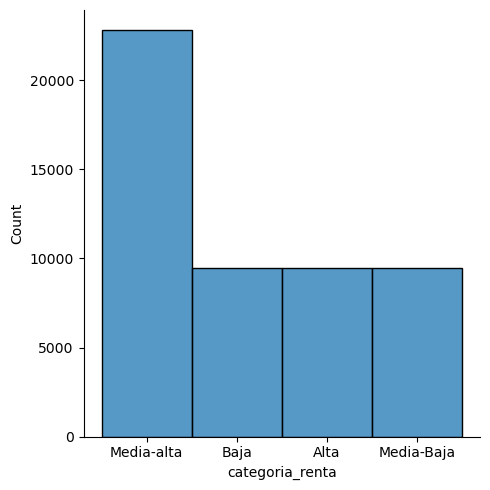

In [167]:
sns.displot(x=obs['categoria_renta'])

In [213]:
# agrupacion de grupos etarios
bins = [0, 18, 30, 50, float('inf')]
labels = ['<18', '18-30', '31-50', '>50']

obs.loc[:, 'grupo_edad'] = pd.cut(obs.loc[:, 'Edad'], bins=bins, labels=labels)

obs.head()

,Edad,Renta,Antiguedad,Internauta,antiguedad_anios,promedio_txs_mensual,promedio_fact_tc,ponderacion_fact_renta,Sexo_H,Sexo_M,categoria_renta_Alta,categoria_renta_Baja,categoria_renta_Media-Baja,categoria_renta_Media-alta,grupo_edad_<18,grupo_edad_18-30,grupo_edad_31-50,grupo_edad_>50,grupo_edad
0,43,663077.078726,130,1,10,1.916667,32185.250000,0.048539,0,1,0,0,0,1,0,0,1,0,31-50
1,46,143640.000000,69,1,5,3.666667,112918.448117,0.786121,1,0,0,1,0,0,0,0,1,0,31-50
2,45,929106.000000,24,1,2,5.000000,148982.416667,0.160350,1,0,1,0,0,0,0,0,1,0,31-50
3,46,172447.000000,134,0,11,2.083333,34523.833333,0.200200,1,0,0,1,0,0,0,0,1,0,31-50
4,46,805250.000000,116,0,9,8.916667,293939.000000,0.365028,1,0,0,0,0,1,0,0,1,0,31-50


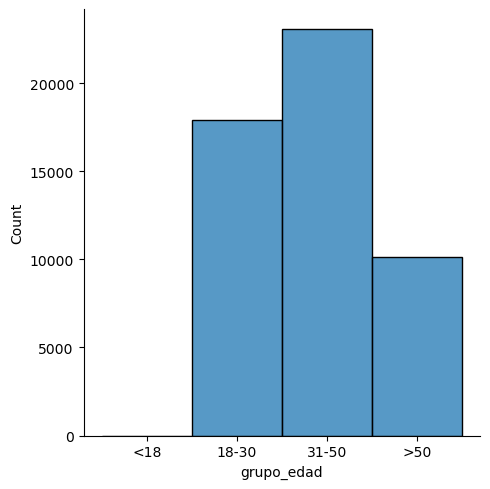

In [171]:
sns.displot(x=obs['grupo_edad'])

In [211]:
# promedio de transacciones mensuales por clientes de entre 18 a 30 años
# TODO probar nuevamente, imputando los nans

transacciones_mensuales = df[['Txs_T12', 'Txs_T11', 'Txs_T10', 'Txs_T09', 'Txs_T08', 'Txs_T07', 'Txs_T06', 'Txs_T05', 'Txs_T04', 'Txs_T03', 'Txs_T02', 'Txs_T01']]

obs.loc[:, 'promedio_txs_mensual'] = transacciones_mensuales.mean(axis=1)
obs.head()

,Edad,Renta,Antiguedad,Internauta,antiguedad_anios,promedio_txs_mensual,promedio_fact_tc,ponderacion_fact_renta,Sexo_H,Sexo_M,categoria_renta_Alta,categoria_renta_Baja,categoria_renta_Media-Baja,categoria_renta_Media-alta,grupo_edad_<18,grupo_edad_18-30,grupo_edad_31-50,grupo_edad_>50
0,43,663077.078726,130,1,10,1.916667,32185.250000,0.048539,0,1,0,0,0,1,0,0,1,0
1,46,143640.000000,69,1,5,3.666667,112918.448117,0.786121,1,0,0,1,0,0,0,0,1,0
2,45,929106.000000,24,1,2,5.000000,148982.416667,0.160350,1,0,1,0,0,0,0,0,1,0
3,46,172447.000000,134,0,11,2.083333,34523.833333,0.200200,1,0,0,1,0,0,0,0,1,0
4,46,805250.000000,116,0,9,8.916667,293939.000000,0.365028,1,0,0,0,0,1,0,0,1,0


In [209]:
# capacidad financiera relativa para clientes de entre 18 años y 30 años
# Gasto promedio en TC dividido por la renta.
Fac_TC = df[['Fac_T12', 'Fac_T11', 'Fac_T10', 'Fac_T09', 'Fac_T08', 'Fac_T07', 'Fac_T06', 'Fac_T05', 'Fac_T04', 'Fac_T03', 'Fac_T02', 'Fac_T01']]

obs['promedio_fact_tc'] = Fac_TC.mean(axis=1)

# Promedio de Facturacion dividido por la renta
obs.loc[:, 'ponderacion_fact_renta'] = obs.loc[:, 'promedio_fact_tc'] / obs.loc[:, 'Renta']
obs.head()

,Edad,Renta,Antiguedad,Internauta,antiguedad_anios,promedio_txs_mensual,promedio_fact_tc,ponderacion_fact_renta,Sexo_H,Sexo_M,categoria_renta_Alta,categoria_renta_Baja,categoria_renta_Media-Baja,categoria_renta_Media-alta,grupo_edad_<18,grupo_edad_18-30,grupo_edad_31-50,grupo_edad_>50
0,43,663077.078726,130,1,10,1.916667,32185.250000,0.048539,0,1,0,0,0,1,0,0,1,0
1,46,143640.000000,69,1,5,3.666667,112918.448117,0.786121,1,0,0,1,0,0,0,0,1,0
2,45,929106.000000,24,1,2,5.000000,148982.416667,0.160350,1,0,1,0,0,0,0,0,1,0
3,46,172447.000000,134,0,11,2.083333,34523.833333,0.200200,1,0,0,1,0,0,0,0,1,0
4,46,805250.000000,116,0,9,8.916667,293939.000000,0.365028,1,0,0,0,0,1,0,0,1,0


In [177]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Sexo                    51123 non-null  object  
 1   Edad                    51124 non-null  int64   
 2   Renta                   51124 non-null  float64 
 3   Antiguedad              51124 non-null  int64   
 4   Internauta              51124 non-null  int64   
 5   antiguedad_anios        51124 non-null  int64   
 6   categoria_renta         51124 non-null  object  
 7   grupo_edad              51124 non-null  category
 8   promedio_txs_mensual    51124 non-null  float64 
 9   promedio_fact_tc        51124 non-null  float64 
 10  ponderacion_fact_renta  51124 non-null  float64 
dtypes: category(1), float64(4), int64(4), object(2)
memory usage: 3.9+ MB


In [181]:
# one hot encoder para las nuevas variables
obs = pd.get_dummies(obs, columns=['Sexo', 'categoria_renta', 'grupo_edad'], dtype=int)
obs.head()

,Edad,Renta,Antiguedad,Internauta,antiguedad_anios,promedio_txs_mensual,promedio_fact_tc,ponderacion_fact_renta,Sexo_H,Sexo_M,categoria_renta_Alta,categoria_renta_Baja,categoria_renta_Media-Baja,categoria_renta_Media-alta,grupo_edad_<18,grupo_edad_18-30,grupo_edad_31-50,grupo_edad_>50
0,43,663077.078726,130,1,10,1.916667,32185.250000,0.048539,0,1,0,0,0,1,0,0,1,0
1,46,143640.000000,69,1,5,3.666667,112918.448117,0.786121,1,0,0,1,0,0,0,0,1,0
2,45,929106.000000,24,1,2,5.000000,148982.416667,0.160350,1,0,1,0,0,0,0,0,1,0
3,46,172447.000000,134,0,11,2.083333,34523.833333,0.200200,1,0,0,1,0,0,0,0,1,0
4,46,805250.000000,116,0,9,8.916667,293939.000000,0.365028,1,0,0,0,0,1,0,0,1,0


In [183]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        51124 non-null  int64  
 1   Renta                       51124 non-null  float64
 2   Antiguedad                  51124 non-null  int64  
 3   Internauta                  51124 non-null  int64  
 4   antiguedad_anios            51124 non-null  int64  
 5   promedio_txs_mensual        51124 non-null  float64
 6   promedio_fact_tc            51124 non-null  float64
 7   ponderacion_fact_renta      51124 non-null  float64
 8   Sexo_H                      51124 non-null  int32  
 9   Sexo_M                      51124 non-null  int32  
 10  categoria_renta_Alta        51124 non-null  int32  
 11  categoria_renta_Baja        51124 non-null  int32  
 12  categoria_renta_Media-Baja  51124 non-null  int32  
 13  categoria_renta_Media-alta  511

In [207]:
data_num = obs.select_dtypes(include='number')
target_corr = 'ponderacion_fact_renta'
data_num_corr = data_num.corr()[target_corr]
top_features = data_num_corr[abs(data_num_corr) > 0.3].sort_values(ascending=False)
print("There is {} strongly correlated values with {}:\n{}".format(len(top_features), target_corr, top_features))

There is 1 strongly correlated values with ponderacion_fact_renta:
ponderacion_fact_renta    1.0
Name: ponderacion_fact_renta, dtype: float64
